In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Load the data
movies = pd.read_csv('movies.dat', sep="::" , header=None, names=["MovieID","Title","Genres"],engine='python')
ratings = pd.read_csv("ratings.dat" , sep='::' , header=None, names =['UserID','MovieID','Rating','Timestamp'] , engine='python')
users = pd.read_csv("users.dat", sep='::' , header=None, names =['UserID','Gender','Age','Occupation','Zip-code'] , engine='python')

In [6]:
#Merging
tempDataset = pd.merge(movies,ratings,on='MovieID')
finalDF = pd.merge(tempDataset, users, on='UserID')
finalDF.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


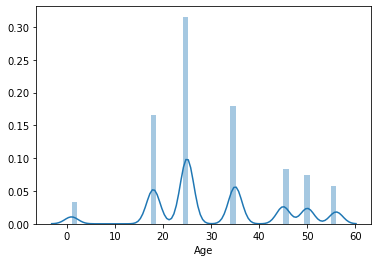

In [7]:
#User Age Distribution
sns.distplot(users.Age)

In [8]:
#User rating of the movie “Toy Story”
finalDF[finalDF.Title.str.contains("Toy Story")]['Title'].unique()

array(['Toy Story (1995)', 'Toy Story 2 (1999)'], dtype=object)

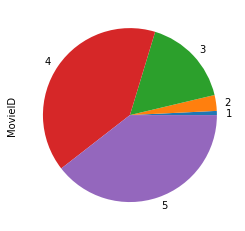

In [9]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count().plot(kind="pie")

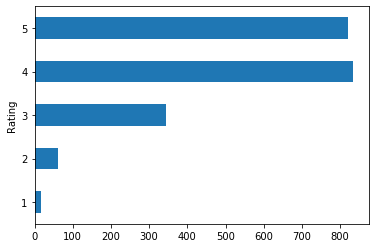

In [10]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count().plot(kind="barh")

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

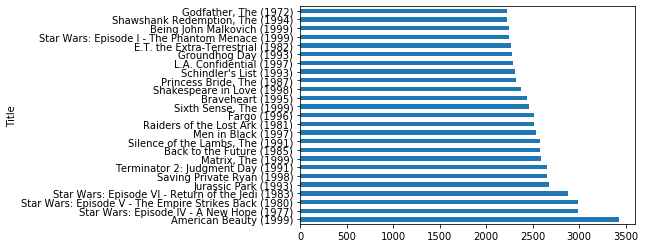

In [11]:
#Top 25 movies by viewership rating
print(finalDF.groupby('Title').Rating.count().nlargest(25))
finalDF.groupby('Title').Rating.count().nlargest(25).plot(kind='barh')

In [12]:
#finalDF.groupby('Title').Rating.count().nsmallest(5)

Rating
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64


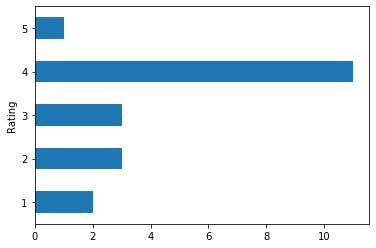

In [13]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
print(finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count())
finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count().plot(kind='barh')

In [14]:
#Find out all the unique genres
list1 = finalDF.Genres.str.split('|').tolist()
finalList = []
for i in list1:
    for j in i:
        finalList.append(j)

        
list(set(finalList))

['Thriller',
 'Drama',
 'Western',
 'Crime',
 'Film-Noir',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Documentary',
 'Action',
 'Comedy',
 'Musical',
 'Romance',
 'Animation',
 'Adventure',
 'Fantasy',
 'War',
 "Children's"]

In [15]:
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
Genres        1000209 non-null object
UserID        1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [16]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
finalOHEDF = pd.concat([finalDF.Genres.str.get_dummies('|') , finalDF.iloc[:,[0,1,3,4,5,6,7,8,9]]] , axis=1)

In [17]:
finalOHEDF.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Western,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,0,0,1,1,1,0,0,0,0,0,...,0,1,Toy Story (1995),1,5,978824268,F,1,10,48067
1,0,0,1,1,0,0,0,0,0,0,...,0,48,Pocahontas (1995),1,5,978824351,F,1,10,48067
2,0,0,0,0,0,0,0,1,0,0,...,0,150,Apollo 13 (1995),1,5,978301777,F,1,10,48067
3,1,1,0,0,0,0,0,0,1,0,...,0,260,Star Wars: Episode IV - A New Hope (1977),1,4,978300760,F,1,10,48067
4,0,0,0,0,0,0,0,1,0,0,...,0,527,Schindler's List (1993),1,5,978824195,F,1,10,48067


In [18]:
#Determine the features affecting the ratings of any particular movie.
#
# Hint: Perform Chi-sqaure test between Xfeature v/s ratings ---- To do feature elimination
#
# and finalize your feature
#
# final numpy array called 'feature'

from scipy.stats import chi2_contingency

ctTitle = pd.crosstab(finalDF.Title,finalDF.Rating)
ctGender = pd.crosstab(finalDF.Gender,finalDF.Rating)
ctAge = pd.crosstab(finalDF.Age,finalDF.Rating)
ctOccupation = pd.crosstab(finalDF.Occupation,finalDF.Rating)
ctZipCode = pd.crosstab(finalDF['Zip-code'],finalDF.Rating)



In [19]:
ctTitle.index.name

'Title'

In [20]:
from scipy.stats import chi2_contingency

list1 = [ctTitle,ctGender,ctAge,ctOccupation,ctZipCode]

for i in list1:
    stat,pvalue,dof,expected_R = chi2_contingency(i)
    if pvalue <= 0.05:
        print("Alternate Hypothesis passed. {} and Rating have Relationship".format(i.index.name))
    else:
        print("Null hypothesis passed. {} and Profit doesnot have  Relationship".format(i.index.name))

Alternate Hypothesis passed. Title and Rating have Relationship
Alternate Hypothesis passed. Gender and Rating have Relationship
Alternate Hypothesis passed. Age and Rating have Relationship
Alternate Hypothesis passed. Occupation and Rating have Relationship
Alternate Hypothesis passed. Zip-code and Rating have Relationship


In [21]:
finalDF.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [22]:
#
# Develop an appropriate model to predict the movie ratings
# using above found feature numpy array and rating as label

features = finalDF.iloc[:,[1,6,7,8]].values
label = finalDF.Rating.values

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
titleLe = LabelEncoder()
genderLe = LabelEncoder()
features[:,0] = titleLe.fit_transform(features[:,0])
features[:,1] = genderLe.fit_transform(features[:,1])
features
ohe = OneHotEncoder(categorical_features=[0,1])
features = ohe.fit_transform(features).toarray()

C:\Users\GMORTHAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\GMORTHAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)